In [344]:
import pandas as pd
import matplotlib.pyplot as pp
import numpy as np
import matplotlib.dates as mdates

from constants import FILENAME

In [345]:
# filename = 'strong2874774480326170738.csv'
df = pd.read_csv(FILENAME, sep=';')

In [6]:
df.head(10)

,Date,Workout Name,Exercise Name,Set Order,Weight,Weight Unit,Reps,Distance,Distance Unit,Seconds,Notes,Workout Notes
0,2019-04-14 11:30:32,Leg,Deadlift (Barbell),1,40.0,kg,15.0,NaN,NaN,0,NaN,NaN
1,2019-04-14 11:30:32,Leg,Deadlift (Barbell),2,60.0,kg,6.0,NaN,NaN,0,NaN,NaN
2,2019-04-14 11:30:32,Leg,Deadlift (Barbell),3,80.0,kg,2.0,NaN,NaN,0,NaN,NaN
3,2019-04-14 11:30:32,Leg,Deadlift (Barbell),4,60.0,kg,7.0,NaN,NaN,0,NaN,NaN
4,2019-04-14 11:30:32,Leg,Deadlift (Barbell),5,60.0,kg,6.0,NaN,NaN,0,NaN,NaN
5,2019-04-14 11:30:32,Leg,Leg Press,1,100.0,kg,15.0,NaN,NaN,0,NaN,NaN
6,2019-04-14 11:30:32,Leg,Leg Press,2,140.0,kg,12.0,NaN,NaN,0,NaN,NaN
7,2019-04-14 11:30:32,Leg,Leg Press,3,160.0,kg,12.0,NaN,NaN,0,NaN,NaN
8,2019-04-14 11:30:32,Leg,Leg Press,4,180.0,kg,14.0,NaN,NaN,0,NaN,NaN
9,2019-04-14 11:30:32,Leg,Leg Press,5,180.0,kg,8.0,NaN,NaN,0,NaN,NaN


In [307]:
deadlifts_df = df.copy()
deadlifts_df['Day'] = pd.to_datetime(deadlifts_df['Date']).apply(lambda x: x.date())
deadlifts_df['day_num'] = (pd.to_datetime(deadlifts_df['Date']) - pd.to_datetime(deadlifts_df['Date']).min()).dt.days
deadlifts_df = deadlifts_df[deadlifts_df['Exercise Name'] == 'Deadlift (Barbell)'].set_index(['Date', 'Set Order']).sort_index(ascending=True)
deadlifts_df['day_diff'] = deadlifts_df['day_num'].diff().fillna(-1)
def set_color(x):
    if x == 0: return 'b'
    return 'r'

def set_x_tick(x):
    if x['day_diff'] != 0: return x['Day']
    return ''

deadlifts_df['color'] = deadlifts_df['day_diff'].apply(set_color)
deadlifts_df['x_tick'] = deadlifts_df.apply(set_x_tick, axis=1)

# deadlifts_df['day_num'] = deadlifts_df['day_num'] - deadlifts_df['day_num'].min()

In [308]:
deadlifts_df.head(10)

Workout Name       Exercise Name  Weight  \
Date                Set Order                                            
2019-01-11 18:31:54 1                  Leg  Deadlift (Barbell)    20.0   
                    2                  Leg  Deadlift (Barbell)    20.0   
                    3                  Leg  Deadlift (Barbell)    20.0   
2019-01-17 20:40:20 1                  Leg  Deadlift (Barbell)    40.0   
                    2                  Leg  Deadlift (Barbell)    50.0   
                    3                  Leg  Deadlift (Barbell)    50.0   
2019-01-24 19:34:12 1                  Leg  Deadlift (Barbell)    40.0   
                    2                  Leg  Deadlift (Barbell)    60.0   
                    3                  Leg  Deadlift (Barbell)    60.0   
                    4                  Leg  Deadlift (Barbell)    60.0   

                              Weight Unit  Reps  Distance Distance Unit  \
Date                Set Order                                             
2019-01-11 18:31:54 1                  kg   5.0       NaN           NaN   
                    2                  kg   4.0       NaN           NaN   
                    3                  kg   6.0       NaN           NaN   
2019-01-17 20:40:20 1                  kg   8.0       NaN           NaN   
                    2                  kg   4.0       NaN           NaN   
                    3                  kg   3.0       NaN           NaN   
2019-01-24 19:34:12 1                  kg   8.0       NaN           NaN   
                    2                  kg   4.0       NaN           NaN   
                    3                  kg   3.0       NaN           NaN   
                    4                  kg   4.0       NaN           NaN   

                               Seconds  Notes Workout Notes         Day  \
Date                Set Order                                             
2019-01-11 18:31:54 1                0    NaN           NaN  2019-01-11   
                    2                0    NaN           NaN  2019-01-11   
                    3                0    NaN           NaN  2019-01-11   
2019-01-17 20:40:20 1                0    NaN           NaN  2019-01-17   
                    2                0    NaN           NaN  2019-01-17   
                    3                0    NaN           NaN  2019-01-17   
2019-01-24 19:34:12 1                0    NaN           NaN  2019-01-24   
                    2                0    NaN           NaN  2019-01-24   
                    3                0    NaN           NaN  2019-01-24   
                    4                0    NaN           NaN  2019-01-24   

                               day_num  day_diff color      x_tick  
Date                Set Order                                       
2019-01-11 18:31:54 1                0      -1.0     r  2019-01-11  
                    2                0       0.0     b              
                    3                0       0.0     b              
2019-01-17 20:40:20 1                6       6.0     r  2019-01-17  
                    2                6       0.0     b              
                    3                6       0.0     b              
2019-01-24 19:34:12 1               13       7.0     r  2019-01-24  
                    2               13       0.0     b              
                    3               13       0.0     b              
                    4               13       0.0     b

Text(0, 81.0, 'PR: 80.0 kg')

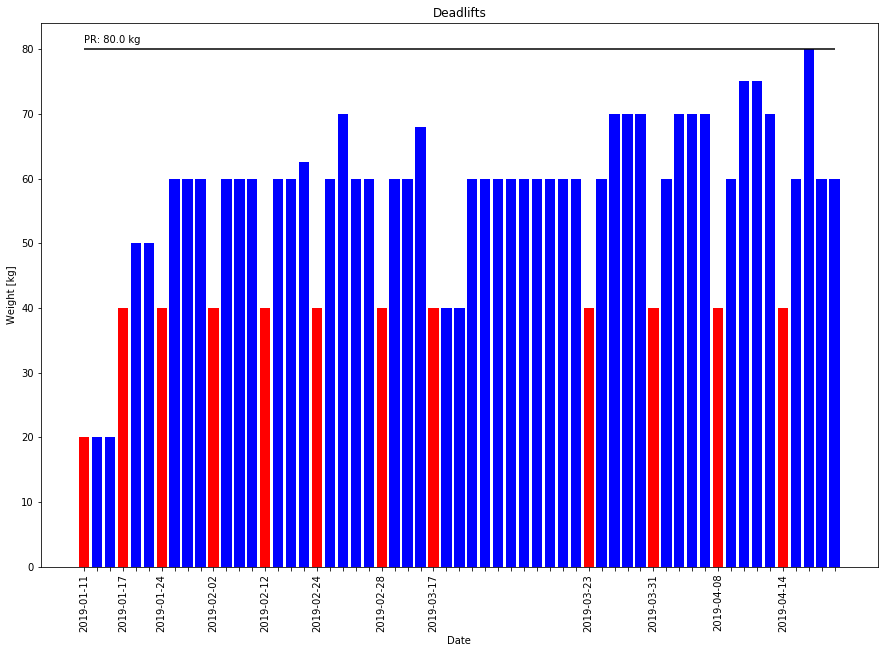

In [324]:
pp.figure(figsize=(15,10))
x = np.arange(len(deadlifts_df['day_num']))
pp.ylabel('Weight [kg]')
pp.xlabel('Date')
pp.title('Deadlifts')
pp.xticks(x,deadlifts_df['Day'],rotation='vertical')
pp.bar(x, deadlifts_df['Weight'], color=deadlifts_df['color'], tick_label = deadlifts_df['x_tick'] )
pp.hlines(deadlifts_df['Weight'].max(), x[0], x[-1], label=f'PR: {deadlifts_df["Weight"].max()} kg')
pp.text(x[0],deadlifts_df['Weight'].max() + 1,f'PR: {deadlifts_df["Weight"].max()} kg')


In [269]:
# copy and filter out 
filtered_df = df.copy()
filtered_df = filtered_df[filtered_df['Weight'].notnull()]
filtered_df = filtered_df[filtered_df['Weight']!= 0]
# filtered_df[filtered_df['Exercise Name'] == 'Pull Up']
#  create day num
filtered_df['Day'] = pd.to_datetime(filtered_df['Date']).apply(lambda x: x.date())
filtered_df['day_num'] = (pd.to_datetime(filtered_df['Date']) - pd.to_datetime(filtered_df['Date']).min()).dt.days
filtered_df = filtered_df.set_index(['Date', 'Set Order']).sort_index(ascending=True)
filtered_d

Workout Name                Exercise Name  \
Date                Set Order                                             
2019-01-11 18:31:54 1                  Leg           Deadlift (Barbell)   
                    1                  Leg                    Leg Press   
                    1                  Leg    Seated Leg Curl (Machine)   
                    1                  Leg  Seated Calf Raise (Machine)   
                    2                  Leg           Deadlift (Barbell)   

                               Weight Weight Unit  Reps  Distance  \
Date                Set Order                                       
2019-01-11 18:31:54 1           20.00          kg   5.0       NaN   
                    1           18.14          kg   8.0       NaN   
                    1           32.00          kg  12.0       NaN   
                    1           20.00          kg  15.0       NaN   
                    2           20.00          kg   4.0       NaN   

                              Distance Unit  Seconds  Notes Workout Notes  \
Date                Set Order                                               
2019-01-11 18:31:54 1                   NaN        0    NaN           NaN   
                    1                   NaN        0    NaN           NaN   
                    1                   NaN        0    NaN           NaN   
                    1                   NaN        0    NaN           NaN   
                    2                   NaN        0    NaN           NaN   

                                      Day  day_num  
Date                Set Order                       
2019-01-11 18:31:54 1          2019-01-11        0  
                    1          2019-01-11        0  
                    1          2019-01-11        0  
                    1          2019-01-11        0  
                    2          2019-01-11        0

,Date,Workout Name,Exercise Name,Set Order,Weight,Weight Unit,Reps,Distance,Distance Unit,Seconds,Notes,Workout Notes


In [175]:
exercise_list = list(filtered_df['Exercise Name'].unique())
exercise_list

['Deadlift (Barbell)',
 'Leg Press',
 'Seated Leg Curl (Machine)',
 'Seated Calf Raise (Machine)',
 'Lat Pulldown (Cable)',
 'Hammer Curl (Dumbbell)',
 'Seated Row (Machine)',
 'Bench Press (Dumbbell)',
 'Chest Fly',
 'Triceps Extension',
 'Overhead Press (Barbell)',
 'Lateral Raise (Dumbbell)',
 'Shoulder Press (Machine)',
 'Iso-Lateral Chest Press (Machine)',
 'Lateral Raise (Cable)',
 'Bicep Curl (Barbell)',
 'Deadlift (Dumbbell)',
 'Front Raise (Dumbbell)',
 'Overhead Press (Dumbbell)',
 'Chest Fly (Band)',
 'Bicep Curl (Cable)',
 'Chest Press (Machine)']

Deadlift (Barbell)
Leg Press
Seated Leg Curl (Machine)
Seated Calf Raise (Machine)
Lat Pulldown (Cable)
Hammer Curl (Dumbbell)
Seated Row (Machine)
Bench Press (Dumbbell)
Chest Fly
Triceps Extension
Overhead Press (Barbell)
Lateral Raise (Dumbbell)
Shoulder Press (Machine)
Iso-Lateral Chest Press (Machine)
Lateral Raise (Cable)
Bicep Curl (Barbell)
Deadlift (Dumbbell)
Front Raise (Dumbbell)
Overhead Press (Dumbbell)
Chest Fly (Band)
Bicep Curl (Cable)
Chest Press (Machine)


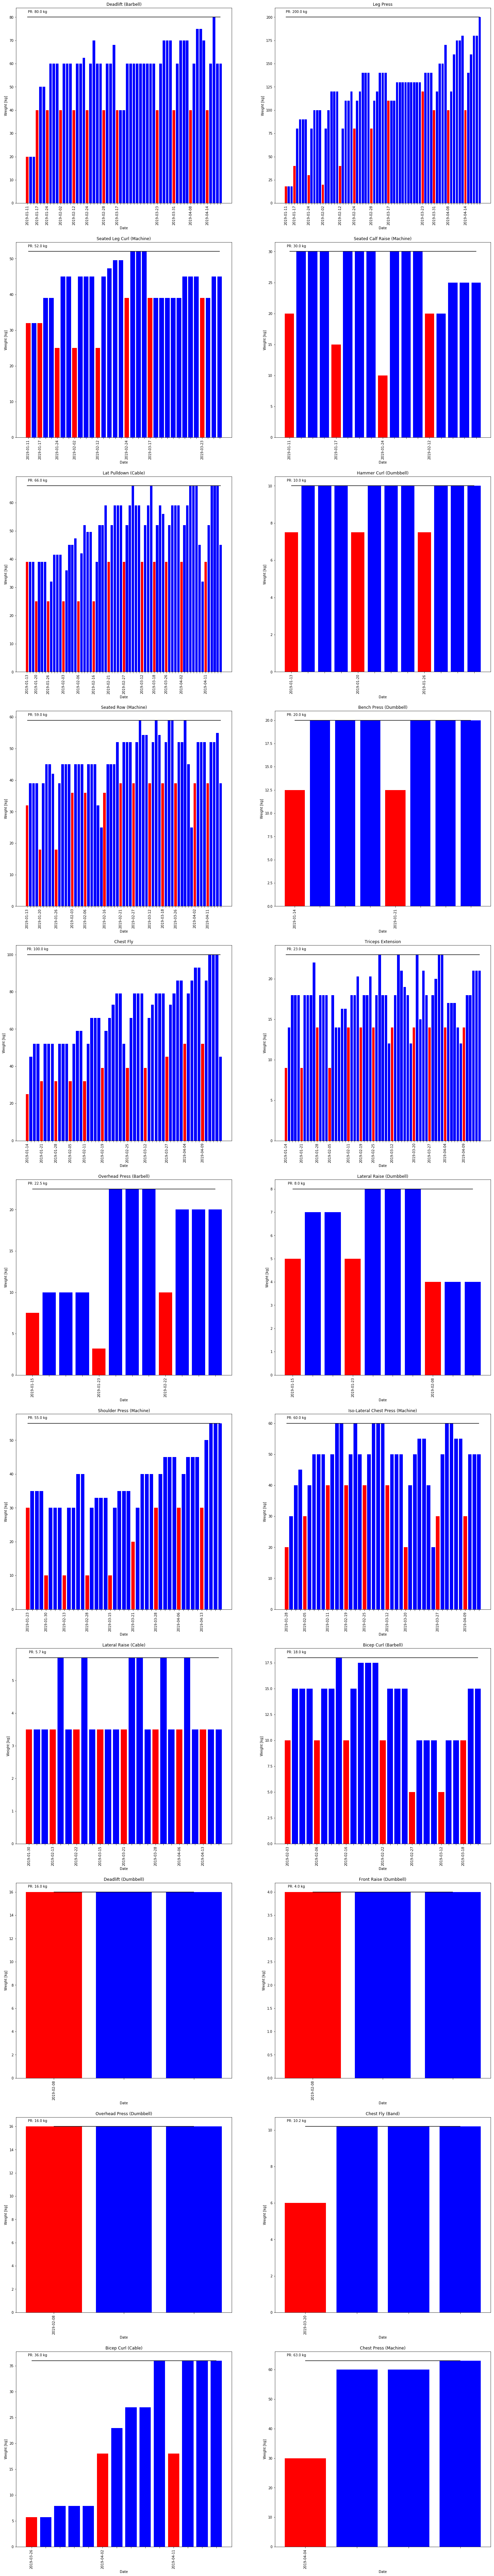

In [342]:
num_cols = 2
num_rows = int(len(exercise_list)/num_cols) + 1
# fig, ax = pp.subplots(num_rows, num_cols, figsize=(15*num_cols,20*num_rows))
fig = pp.figure(1)
fig.set_figheight(150)
fig.set_figwidth(25)
for i, exercise_name in enumerate(exercise_list):
#     if i> 3: break
    print(exercise_name)
    cur_df = filtered_df[filtered_df['Exercise Name'] == exercise_name].copy()
#     cur_plot = ax[ i % num_cols, i ]
    cur_plot = fig.add_subplot(num_rows, num_cols, i+1)
    
    x = np.arange(len(cur_df['day_num']))
    
    cur_df['day_diff'] = cur_df['day_num'].diff().fillna(-1)
    cur_df['color'] = cur_df['day_diff'].apply(set_color)
    cur_df['x_tick'] = cur_df.apply(set_x_tick, axis=1)
    
    
    cur_plot.bar(x, cur_df['Weight'], color=cur_df['color'], tick_label = cur_df['x_tick'])
    cur_plot.set_title(exercise_name)
    cur_plot.set_ylabel('Weight [kg]')
    cur_plot.set_xlabel('Date')
    
    cur_plot.hlines(cur_df['Weight'].max(), x[0], x[-1])
    
    pr_text = f'PR: {cur_df["Weight"].max()} kg'
    
    cur_plot.text(0.1, 0.98,pr_text, ha='center', va='center', transform=cur_plot.transAxes)
#     cur_plot.set_xticks(x)
#     cur_plot.set_xticklabels(cur_df['Day'])
    
    for tick in cur_plot.get_xticklabels():
        tick.set_rotation(90)
        
fig.savefig('strong.png')